In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

gas sector:


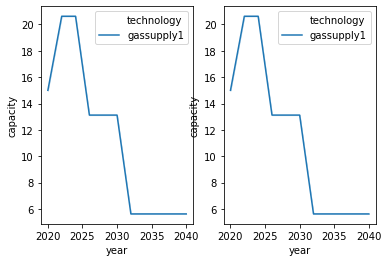

power sector:


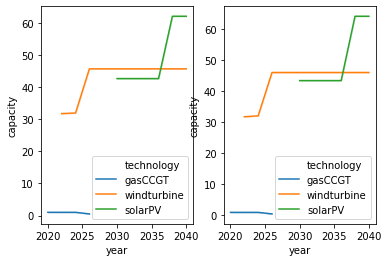

residential sector:


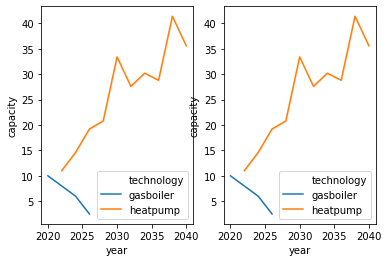

In [3]:
mca_capacity = pd.read_csv("Results/MCACapacity.csv")

for name, sector in mca_capacity.groupby("sector"):
    print("{} sector:".format(name))
    fig, ax =plt.subplots(1,2)
    sns.lineplot(data=sector[sector.region=="R1"], x="year", y="capacity", hue="technology", ax=ax[0])
    sns.lineplot(data=sector[sector.region=="R2"], x="year", y="capacity", hue="technology", ax=ax[1])
    plt.show()
    plt.close()

In [15]:
import glob

path = r'/Users/alexkell/Documents/SGI/2-documentation/StarMuse/docs/tutorial-code/4-modify-timing-data/2-modify-time-framework/Results/Residential/Capacity/'

all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    year_needed = filename.split("/")[-1].split(".")[0]
    filtered_year = df[df.year==int(year_needed)]
    li.append(filtered_year)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,asset,year,region,installed,technology,capacity
0,5,2040,R1,2030,heatpump,10.4
1,7,2040,R1,2032,heatpump,12.4
2,9,2040,R1,2034,heatpump,6.4
3,11,2040,R1,2036,heatpump,28.4
4,13,2040,R1,2038,heatpump,13.6
...,...,...,...,...,...,...
91,17,2038,R2,2028,heatpump,25.2
92,19,2038,R2,2030,heatpump,10.4
93,21,2038,R2,2032,heatpump,12.4
94,23,2038,R2,2034,heatpump,6.4


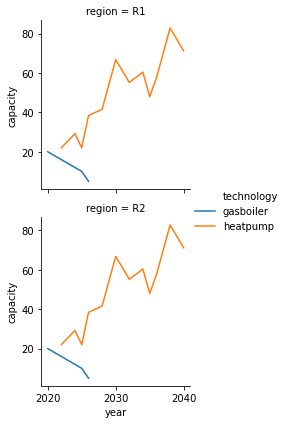

In [17]:
grouped_by = frame.groupby(["year", "technology","region"]).sum().reset_index()
grouped_by

g = sns.FacetGrid(data=grouped_by, row="region")
g.map(sns.lineplot, "year", "capacity", "technology")
g.add_legend()